In [1]:
mutable struct SimpleNeuronSimulationConfig
    v0::Float64
    u_0::Float64
    I::Float64
    a::Float64
    b::Float64
    tspan::Tuple
end

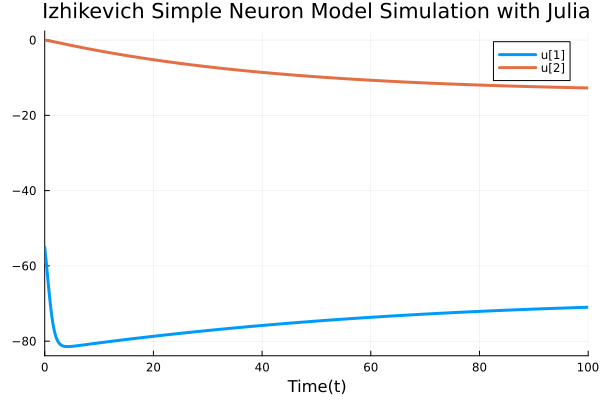

In [6]:
using DifferentialEquations 
using Plots


# initial state/parameter values 
v0 = -55.0  # initial state of v
u_0 = 0.0  # initial state of u
I = 0.69  # base current flowing through neuron
a = 0.02  # alpha 
b = 0.2  # beta 
c = -65.0  # c initial v condition used in spike to reset v 
d = 0.08  # used to slightly offset u in spike reset
start = 0.0
end_time = 100.0
tspan = (start, end_time)

p = (a, b, I)
u0 = [v0, u_0]
tspan = (tspan)


# ode system
function model!(du, u, p, t)
    v, u_ = u
    a, b, I = p 
    du[1] = 0.04v^2 + 5v + 140 - u_ + I
    du[2] = a * (b * v - u_)
end


function spiking_condition(u, t, integrator)
    return u[1] >= 30.0  # spiking condition threshold as per izhikevich paper.
end 


function apply_reset!(integrator)
    integrator.u[1] = c  # reset v to c 
    integrator.u[2] += d  # increment u by d 
end 


cb = DiscreteCallback(spiking_condition, apply_reset!)

problem = ODEProblem(model!, u0, tspan, p)
solution = solve(problem, Tsit5(), callback = cb, reltol = 1e-8, abstol = 1e-8)

plot(solution, linewidth = 3, title = "Izhikevich Simple Neuron Model Simulation with Julia", xaxis = "Time(t)")

In [4]:
for n in range(0, 10)
    println(n)
end

0
1
2
3
4
5
6
7
8
9
10
